**Laboratório de Inovação e Automação 1 (LIA 1) - Atividade fast.ai (15/11)**

---

**ALUNO:** Samuel França da Costa Pedrosa

**MATRÍCULA:** 201900261

---


In [ ]:
! [ -e /content ] && pip install -Uqq fastbook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.1/311.1 kB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 92.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 44.4 MB/s eta 0:00:00


In [ ]:
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [ ]:
from fastbook import *
from fastai.vision.widgets import *

# **Coleta dos Dados**

Primeiro passo é coletar os dados e adicionar cada um em sua respectiva pasta determinada pelo seu rótulo/label.

In [ ]:
labels = "Banana", "Papaya", "Watermelon"
path = Path("fruits")
path_dest = Path("images")
dest = 'images/image.jpg'

Utiliza-se o "search_images_ddg" para pesquisar por imagens a partir de uma string.

In [ ]:
if not path.exists():
    path.mkdir()
    for o in labels:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{o}')
        download_images(dest, urls=results)

# **Tratamento dos Dados**

Como é comum obter imagens que estão corrompidas pela internet. É possível verificar suas existências:

In [ ]:
fns = get_image_files(path)
failed = verify_images(fns)
failed

(#15) [Path('fruits/Watermelon/1990838e-d52a-47a4-8cec-4907fb642923.jpg'),Path('fruits/Watermelon/f8f3ed17-39ce-4935-917a-db21fb005801.jpg'),Path('fruits/Watermelon/9afa225c-6746-46da-b293-c7e5547c6ff0.png'),Path('fruits/Watermelon/df7e8298-8a7e-4cad-ba31-2f3f1bbefc51.jpg'),Path('fruits/Watermelon/81406a4e-900a-4327-a13d-070426fecff5.jpeg'),Path('fruits/Watermelon/656ea5c4-24cb-4c15-9dc5-3d013e7a325a.png'),Path('fruits/Watermelon/f2ed4de3-7344-44bf-ae60-1e02f10f0e87.jpg'),Path('fruits/Banana/6a14af8c-994d-44f9-be75-cf62b20695af.jpg'),Path('fruits/Banana/1319f1a4-f6b2-47b9-8013-403d6a0a4101.jpg'),Path('fruits/Banana/d3d00ba3-c20e-44c4-974c-9a4e08614a44.jpg')...]

Utilizando "map(Path.unlink);", remove-se os arquivos corrompidos ou nulos. Necessário, uma vez que o funcionamento dos algoritmos não conseguem trabalhar com dados inconsistentes.


In [ ]:
failed.map(Path.unlink);

Para as próximas etapas, cria-se um objeto apartir de uma API do FastAI chamado Data Block.

In [ ]:
data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

Um problema com as imagens são os tamanhos diferentes. Das diversas maneiras de resolver isso, uma eficiente é o Augmentation ou Ampliação das imagens.

In [ ]:
# data_squ = data.new(item_tfms=Resize(128, ResizeMethod.Squish)) # Imagens Espremidas
# data_pad = data.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros')) # Imagens com Barras Pretas
data_aug = data.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2)) # Imagens Ampliadas

# **Rotulação e Criação do DataLoader**

Cria-se, então, um Data Loader, objeto que contem os algoritmos necessários para a realização do treinamento e suas aplicações, além de já rotular cada imagem com seu respectivo rótulo.

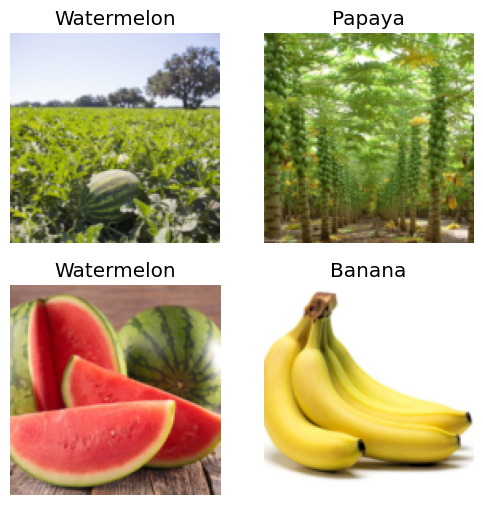

In [ ]:
dls = data.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=2)

Utiliza-se o Data Block com as imagens já tratadas e mostra as imagens de teste.

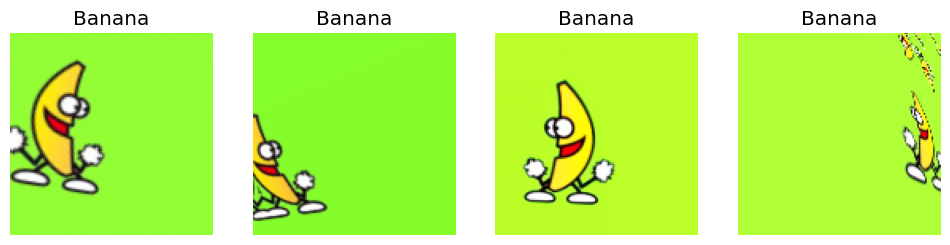

In [ ]:
dls = data_aug.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

# **Treinamento e Criação do Learner**

Para Treinamento, cria-se um outro Data Loader com imagens aleatórias.

In [ ]:
test = data.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = test.dataloaders(path)

Cria-se o Leaner e obtem-se as informações de erros com "Fine-Tune/Afinamento" e "Confusion Matrix/Matriz de Confusão".

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4) # Afinamento

epoch,train_loss,valid_loss,error_rate,time
0,1.237969,0.442682,0.151786,01:21


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.464894,0.259099,0.080357,01:52
1,0.383479,0.167815,0.053571,01:50
2,0.300687,0.136344,0.035714,01:56
3,0.236331,0.132108,0.035714,01:52


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes sh

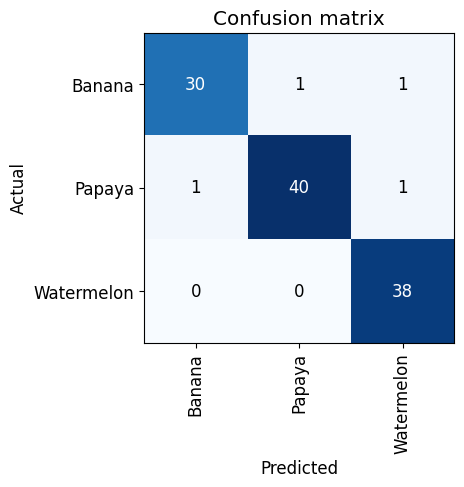

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix() # Matriz de Confusão

Para análise do funcionamento do algoritmo, é possível obter as imagens mais "confusas", ou seja, com maior erro.

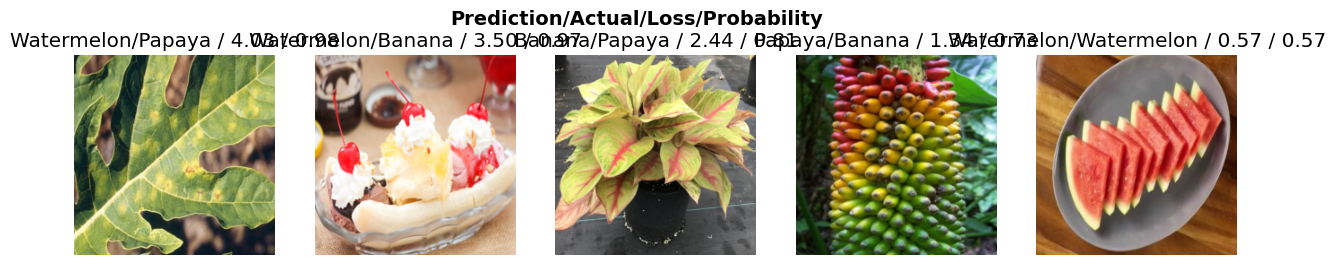

In [ ]:
interp.plot_top_losses(5, nrows=1)

Um método de treinamento visual é utilizar o "Cleaner" que consegue validar dados corrigidos pelo usuário. Para efetivação no modelo, é necessário compilar o código seguinte.

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
# Para efetivação do Cleaner no modelo, é necessário compilar esse código .
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

# **Aplicação**

Para a aplicação online, pe necessário criar um botão de upload de uma imagem para o reconhecimento.

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
btn_upload = SimpleNamespace(data = ["/content/images/banana.jpeg"])
img = PILImage.create(btn_upload.data[-1])

Após o upload da imagem, basta criar a aplicação.

In [ ]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))

pred,pred_idx,probs = learn_inf.predict(img)

lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run = widgets.Button(description='Classify')

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


In [ ]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)
btn_upload = widgets.FileUpload()

Com tudo pronto, a aplicação funcionará com um botão de upload e um de classificação da imagem.

In [ ]:
VBox([widgets.Label('Select your fruit!'),
      btn_upload, btn_run, out_pl, lbl_pred])